#### Chatbots with Langgraph

In [ ]:
%pip install langgraph langsmith langchain langchain_community langchain-groq

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith = userdata.get('LANSMITH_API_KEY')

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['LANGCHAIN_API_KEY'] = os.getenv('LANGCHAIN_API_KEY')

In [3]:
import os
os.environ['LANGCHAIN_API_KEY'] = os.getenv('LANGCHAIN_API_KEY')
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'LanggraphDemo'

In [5]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="openai/gpt-oss-120b")

#### Start Building Chatbot using Langgraph

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    # Messages have the type 'list'. The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in the case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [8]:
def chatbot(state:State):
    return {"messages":llm.invoke(state["messages"])}

In [9]:
graph_builder.add_node("chatbot",chatbot)

In [10]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [11]:
graph = graph_builder.compile()

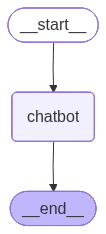

In [12]:
from IPython.display import display, Image
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [13]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("Bye...")
        break
    for event in graph.stream({'messages':('user',user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages']) 
            print("Assistant",value['messages'].content)

dict_values([{'messages': AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user just says "hi". We greet back.'}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 72, 'total_tokens': 110, 'completion_time': 0.081581188, 'prompt_time': 0.006641137, 'queue_time': 9.349467591, 'total_time': 0.088222325}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_91af62a853', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9307a133-bc2b-43e1-8ef0-dc27a1947156-0', usage_metadata={'input_tokens': 72, 'output_tokens': 38, 'total_tokens': 110})}])
content='Hello! How can I help you today?' additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user just says "hi". We greet back.'} response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 72, 'total_tokens': 110, 'completion_time': 0.081581188, 'prompt_time': 0